In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

#setting random seed for reproducability. 
from numpy.random import seed
seed(2)
tf.keras.utils.set_random_seed(2)

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#scale down to value between 0 and 1
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)


#########################################################################################################
## This is the final classifier #########################################################################
## The value for these hyperparameters were decided based on the tests in the "testingPlayground" file ##
#########################################################################################################
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32,
                                 kernel_size=(3, 3),
                                 activation='relu',
                                 input_shape=(28, 28, 1)
                                )
         )
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.Dropout(0.27, seed=5))
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(units=128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dropout(0.27, seed=4))
model.add(tf.keras.layers.Dense(units=128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(units=10, activation=tf.nn.softmax))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=6)
loss, accuracy = model.evaluate(x_test, y_test)
print(accuracy)
print(loss)
model.save('digits-final-tf')


Epoch 1/6
1875/1875 [==============================] - 107s 57ms/step - loss: 0.1731 - accuracy: 0.9478
Epoch 2/6
1875/1875 [==============================] - 109s 58ms/step - loss: 0.0641 - accuracy: 0.9801
Epoch 3/6
1875/1875 [==============================] - 112s 60ms/step - loss: 0.0446 - accuracy: 0.9868
Epoch 4/6
1875/1875 [==============================] - 111s 59ms/step - loss: 0.0322 - accuracy: 0.9897
Epoch 5/6
1875/1875 [==============================] - 111s 59ms/step - loss: 0.0249 - accuracy: 0.9921
Epoch 6/6
313/313 [==============================] - 4s 11ms/step - loss: 0.0419 - accuracy: 0.9890
0.9890000224113464
0.04187459871172905


INFO:tensorflow:Assets written to: digits-final-tf\assets


INFO:tensorflow:Assets written to: digits-final-tf\assets


313/313 [==============================] - 3s 10ms/step
Predicted: 3 - Actual: 5


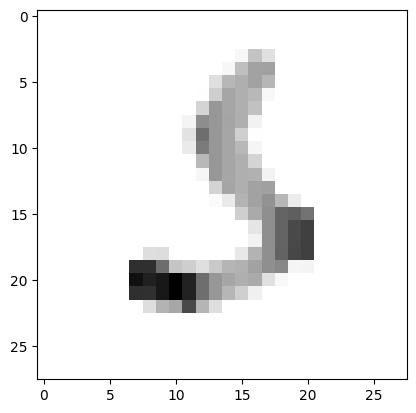

Predicted: 0 - Actual: 6


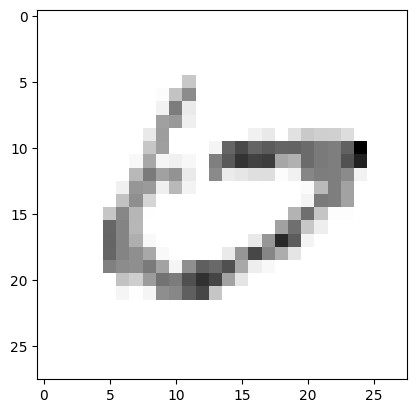

Predicted: 2 - Actual: 8


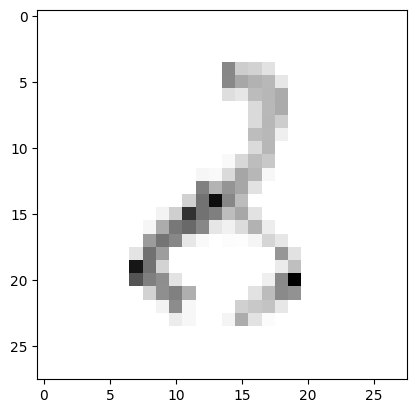

Predicted: 8 - Actual: 1


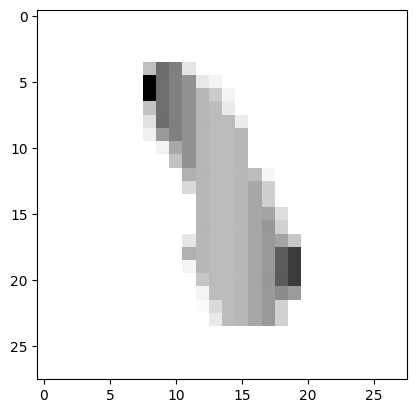

Predicted: 1 - Actual: 2


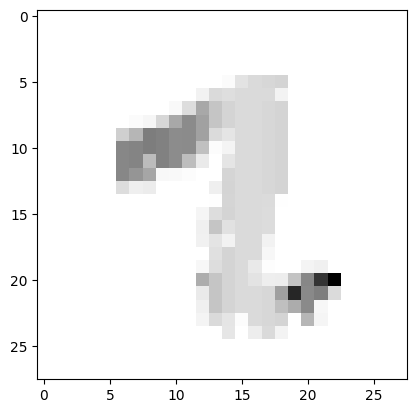

Predicted: 2 - Actual: 7


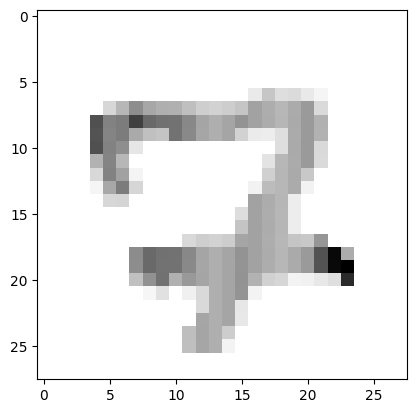

Predicted: 5 - Actual: 3


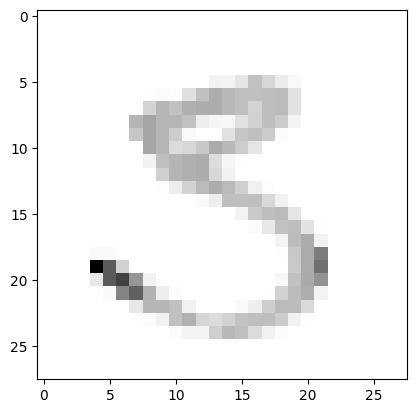

Predicted: 9 - Actual: 8


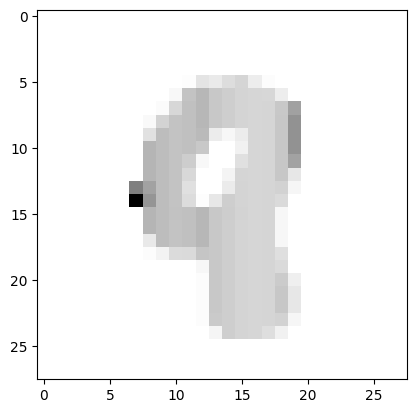

Predicted: 2 - Actual: 1


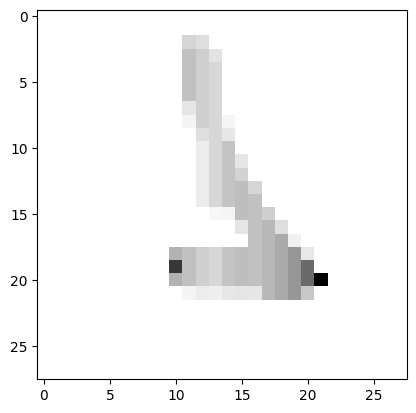

Predicted: 0 - Actual: 6


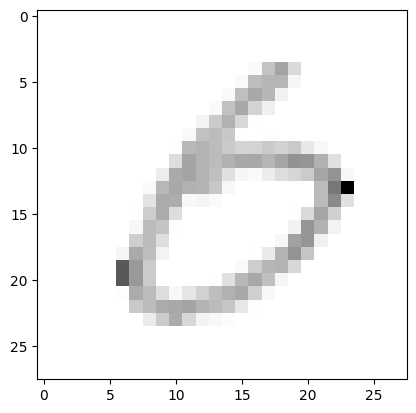

Predicted: 5 - Actual: 6


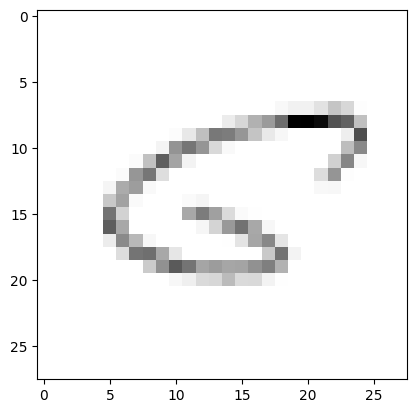

Predicted: 3 - Actual: 7


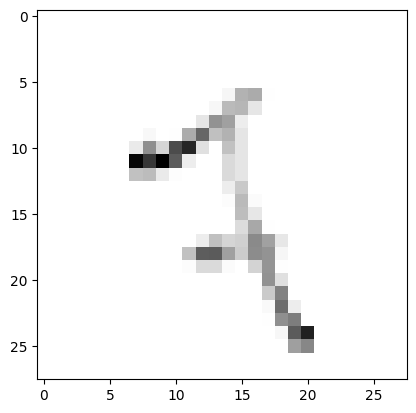

Predicted: 6 - Actual: 4


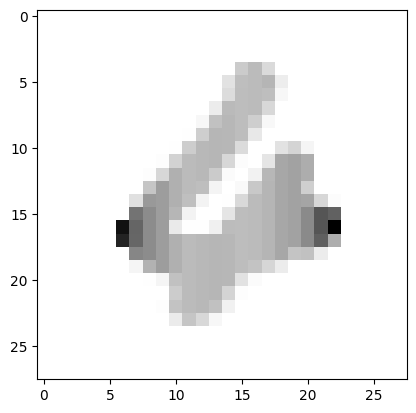

Predicted: 8 - Actual: 3


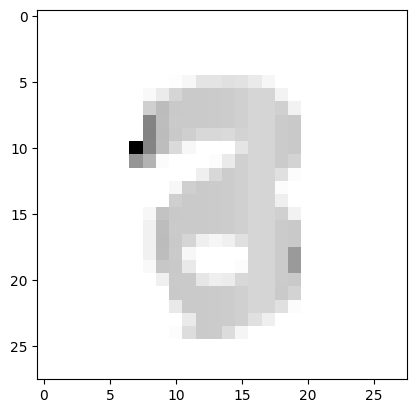

Predicted: 2 - Actual: 7


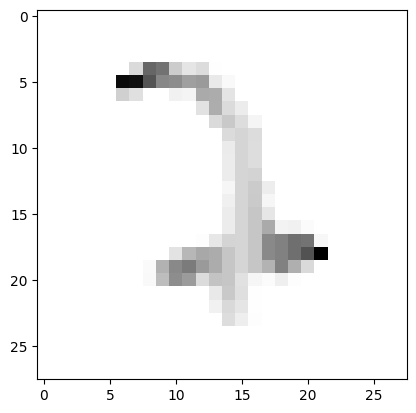

Predicted: 4 - Actual: 9


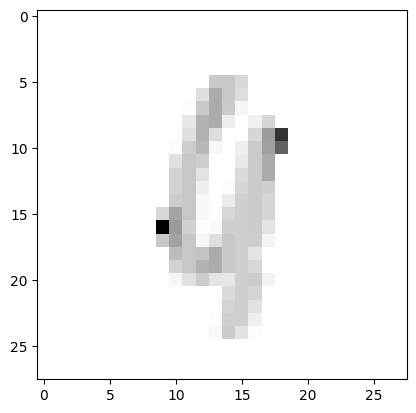

Predicted: 2 - Actual: 9


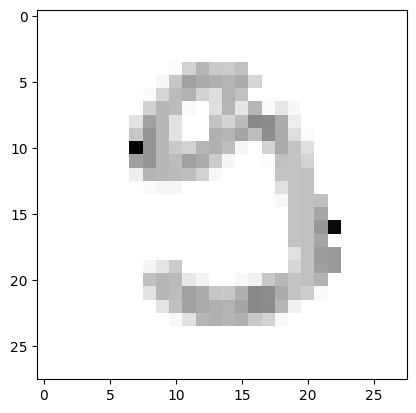

Predicted: 0 - Actual: 8


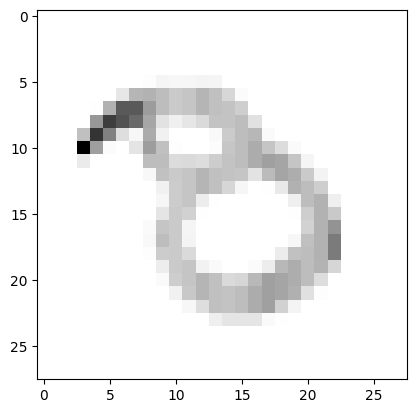

Predicted: 3 - Actual: 5


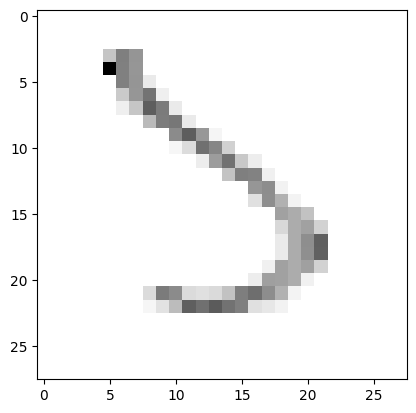

Predicted: 3 - Actual: 9


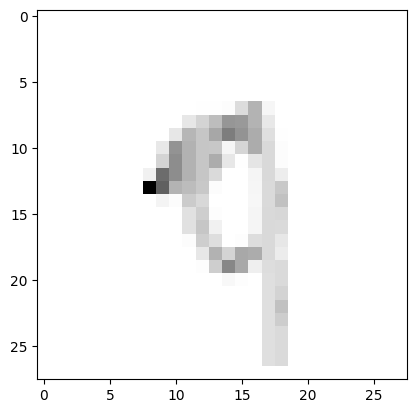

Predicted: 4 - Actual: 9


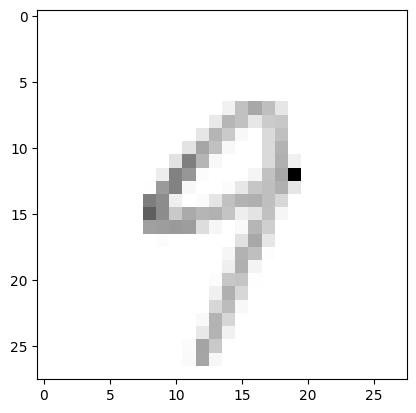

Predicted: 7 - Actual: 8


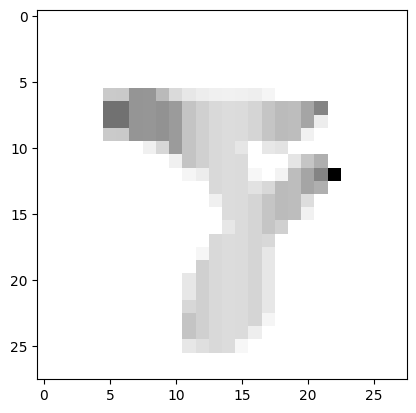

Predicted: 6 - Actual: 5


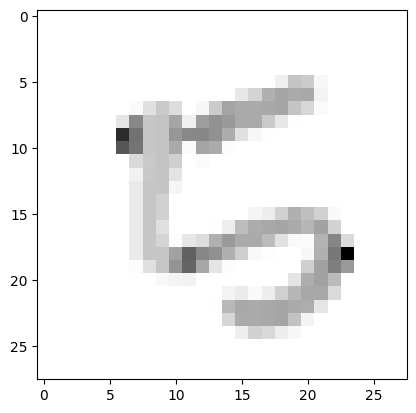

Predicted: 2 - Actual: 7


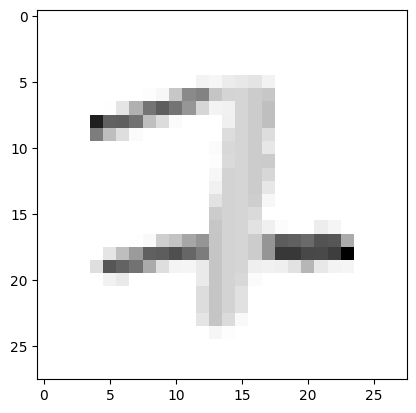

Predicted: 3 - Actual: 8


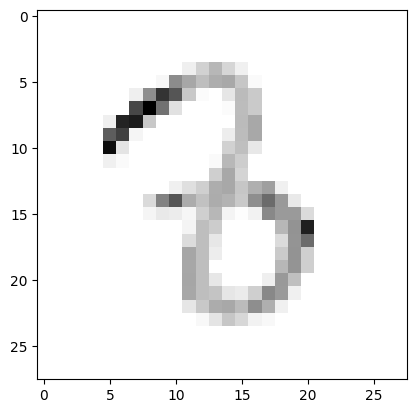

Predicted: 4 - Actual: 9


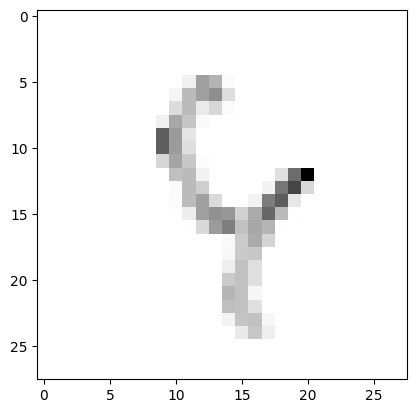

Predicted: 2 - Actual: 7


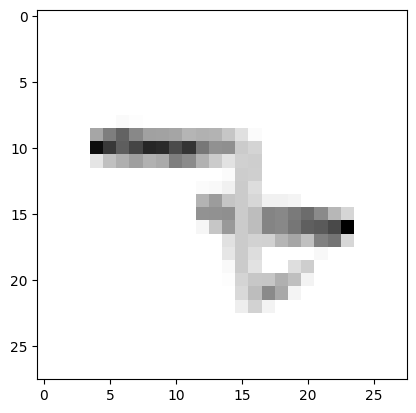

Predicted: 2 - Actual: 8


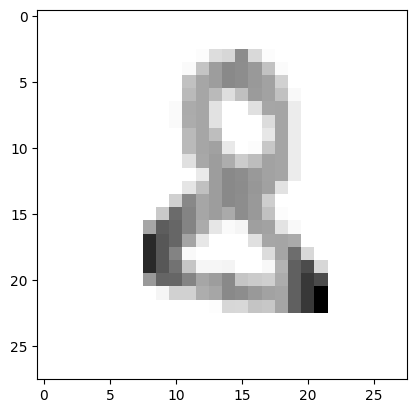

Predicted: 2 - Actual: 1


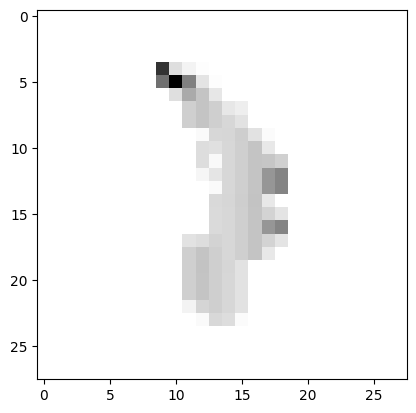

Predicted: 3 - Actual: 5


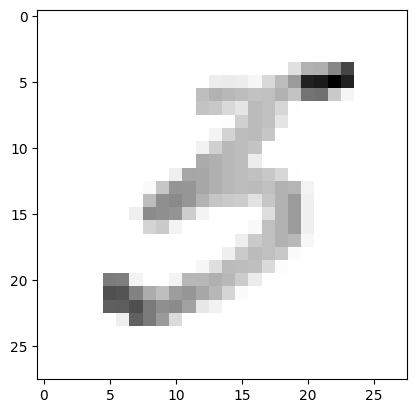

Predicted: 6 - Actual: 5


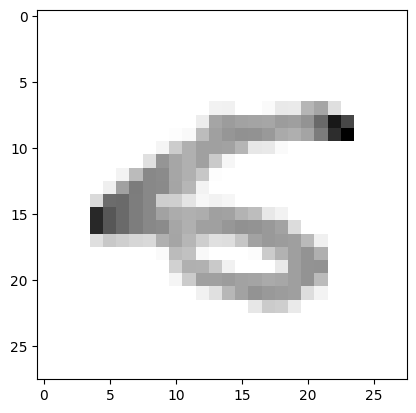

Predicted: 9 - Actual: 7


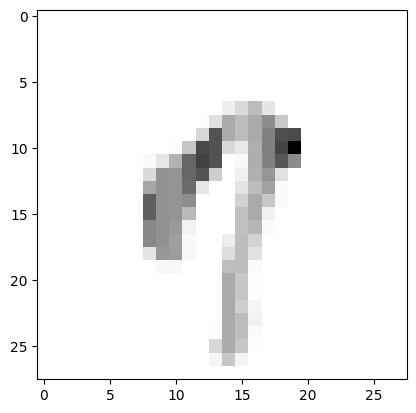

Predicted: 0 - Actual: 6


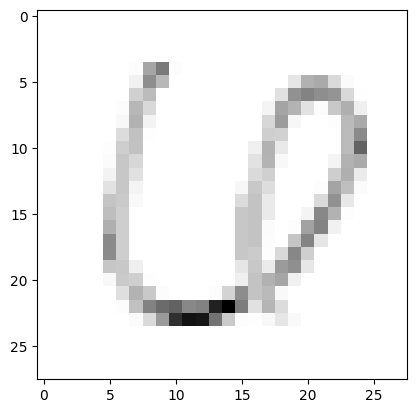

Predicted: 8 - Actual: 9


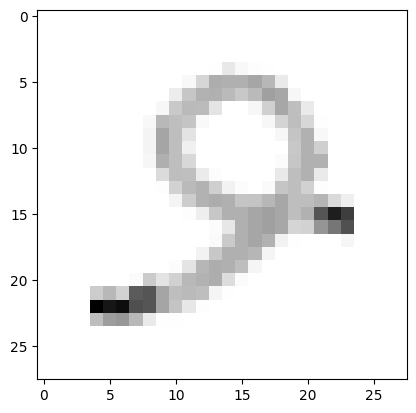

Predicted: 9 - Actual: 4


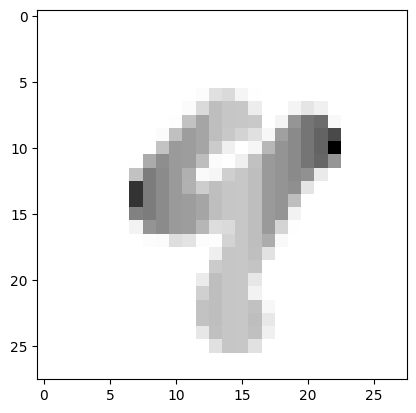

Predicted: 2 - Actual: 1


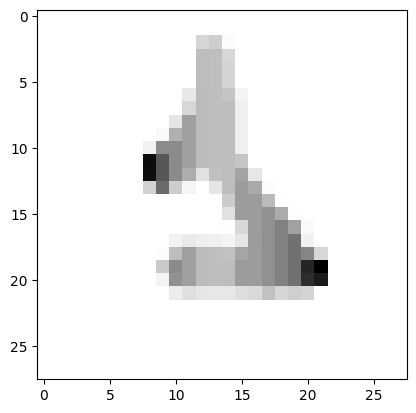

Predicted: 2 - Actual: 9


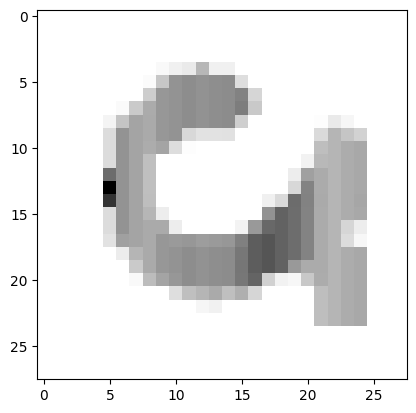

Predicted: 2 - Actual: 0


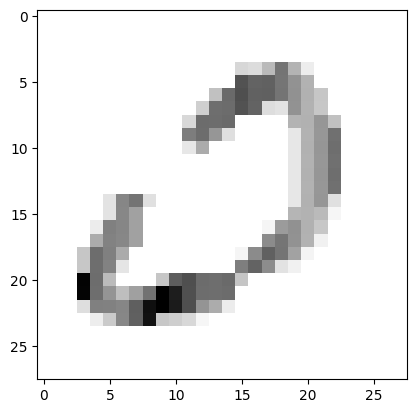

Predicted: 4 - Actual: 9


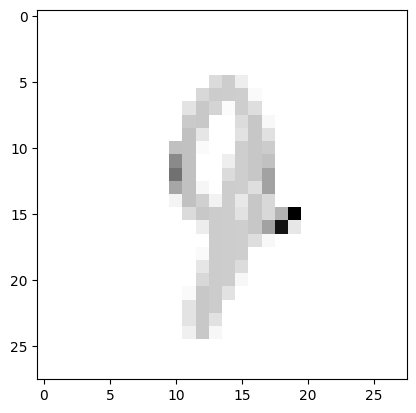

Predicted: 0 - Actual: 2


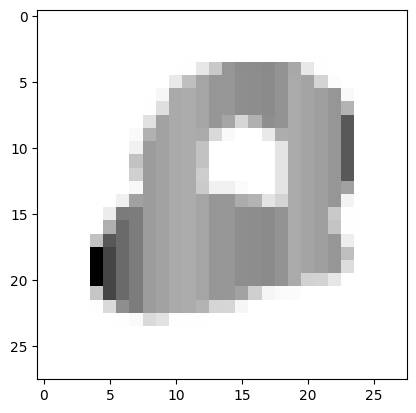

Predicted: 3 - Actual: 5


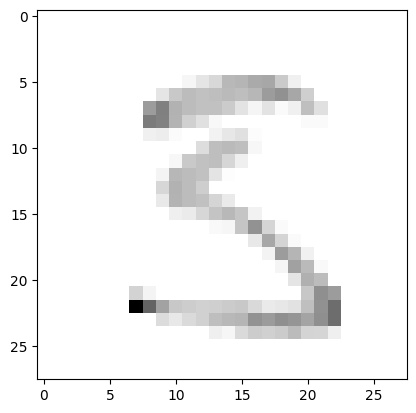

Predicted: 2 - Actual: 7


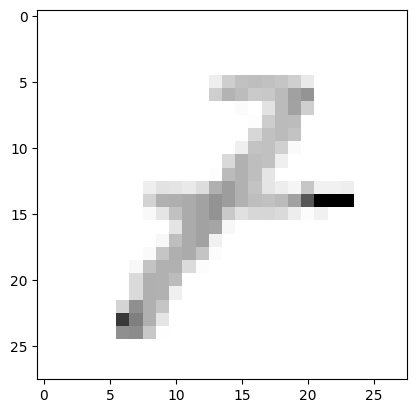

Predicted: 1 - Actual: 6


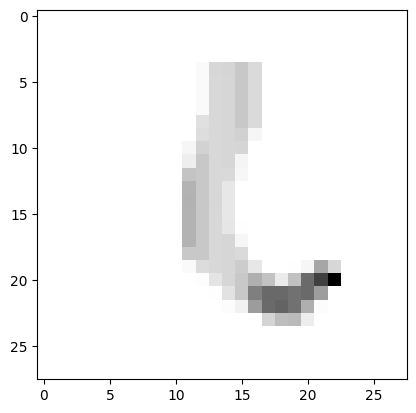

Predicted: 4 - Actual: 9


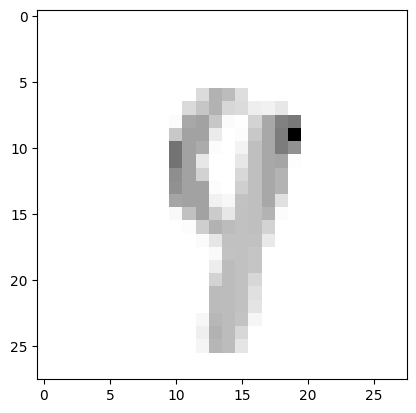

Predicted: 7 - Actual: 9


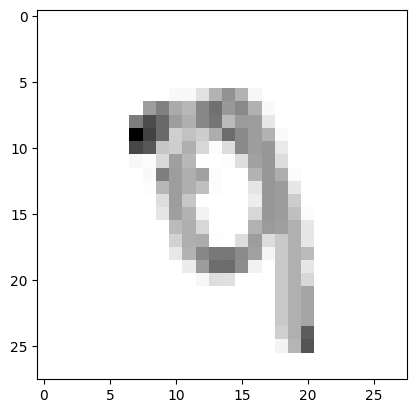

Predicted: 4 - Actual: 9


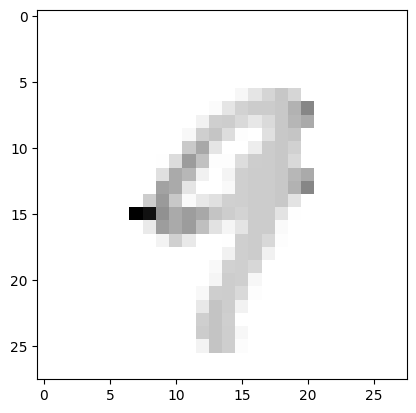

Predicted: 0 - Actual: 8


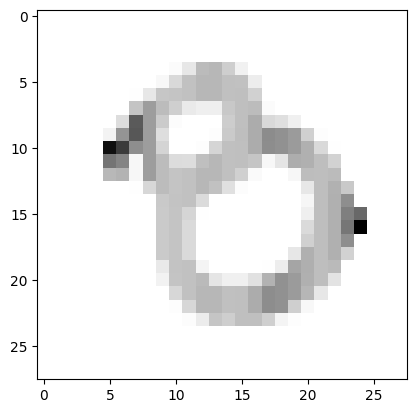

Predicted: 2 - Actual: 3


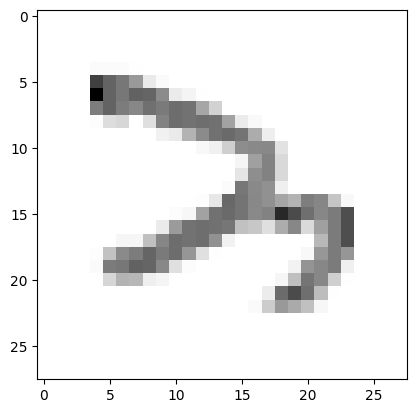

Predicted: 5 - Actual: 9


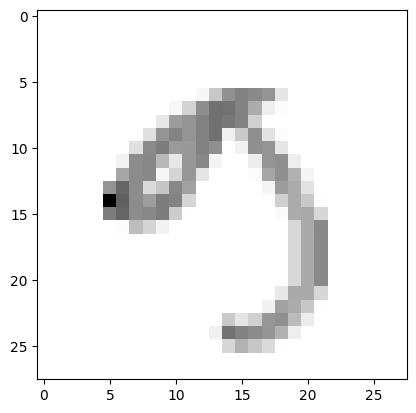

Predicted: 5 - Actual: 3


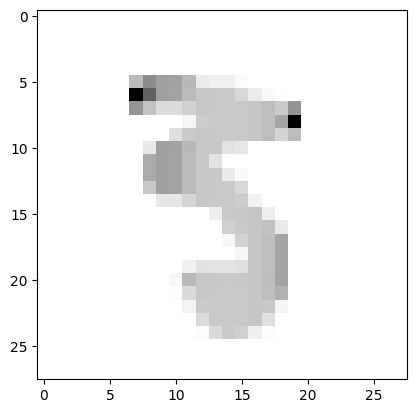

Predicted: 0 - Actual: 6


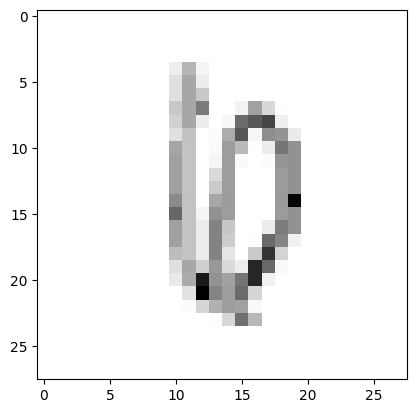

Predicted: 2 - Actual: 1


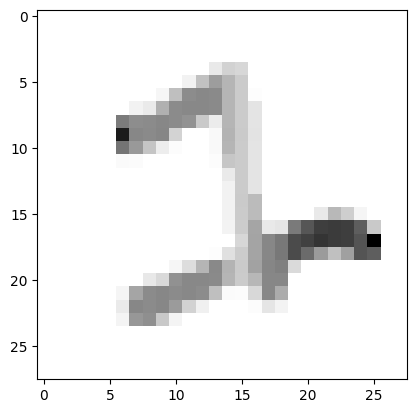

Predicted: 9 - Actual: 7


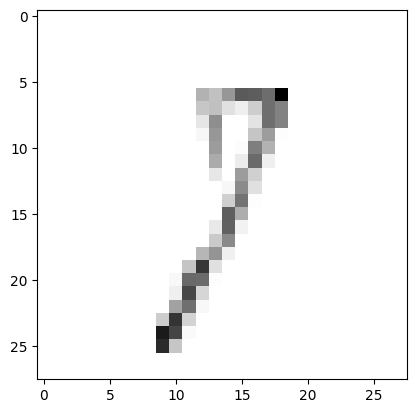

Predicted: 9 - Actual: 8


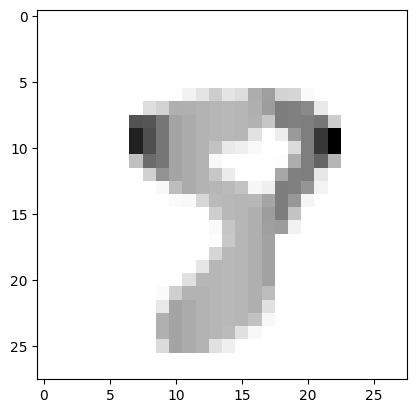

Predicted: 0 - Actual: 6


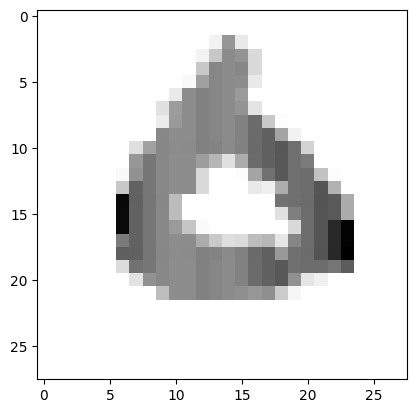

Predicted: 1 - Actual: 9


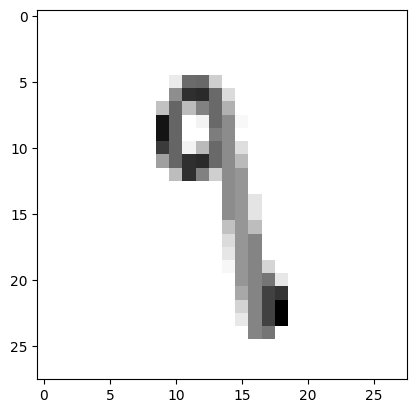

Predicted: 4 - Actual: 6


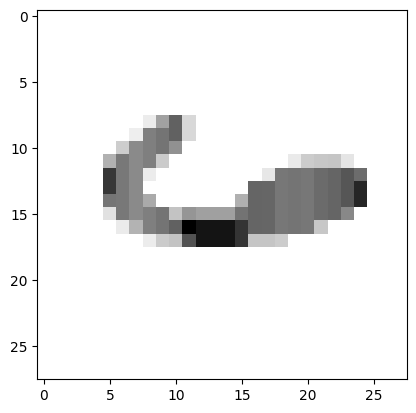

Predicted: 0 - Actual: 5


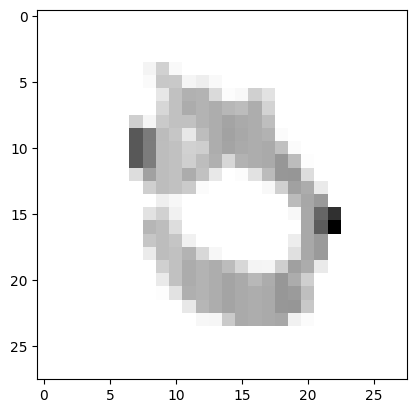

Predicted: 9 - Actual: 8


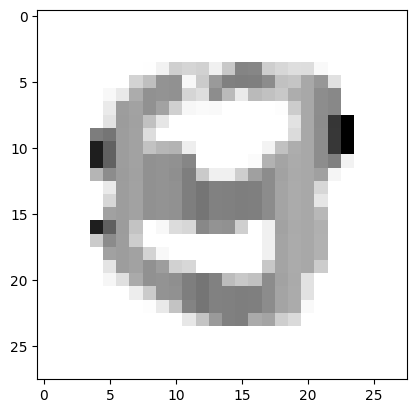

Predicted: 8 - Actual: 6


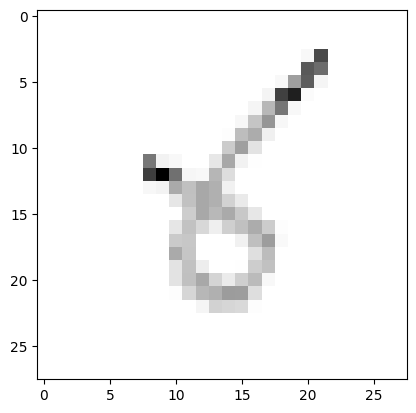

Predicted: 2 - Actual: 5


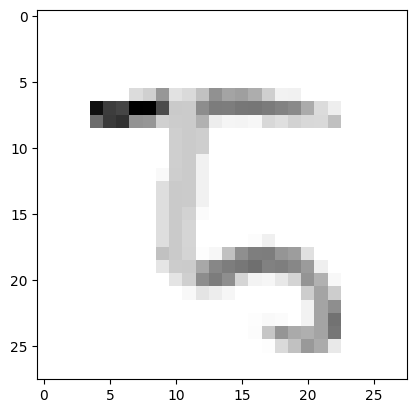

Predicted: 3 - Actual: 7


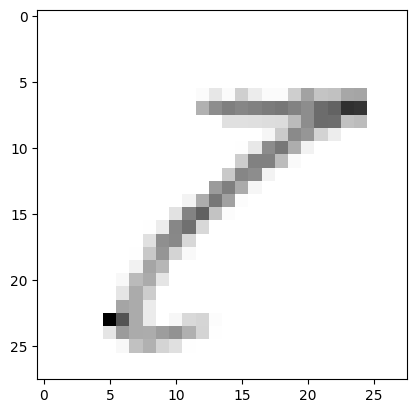

Predicted: 8 - Actual: 6


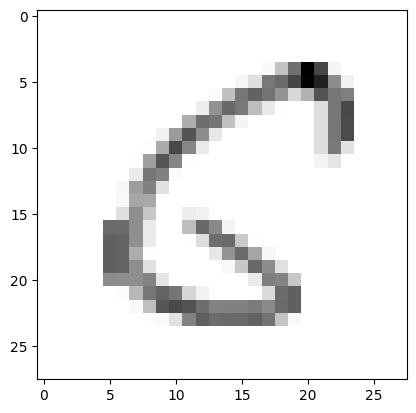

Predicted: 4 - Actual: 9


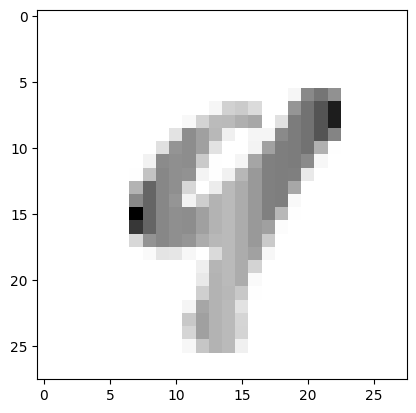

Predicted: 2 - Actual: 1


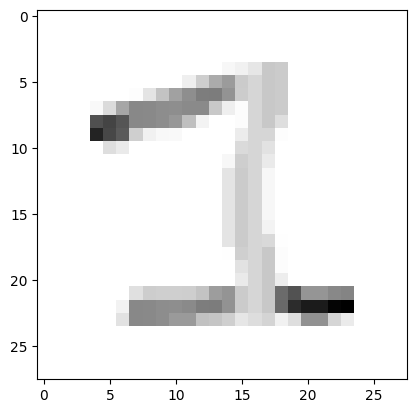

Predicted: 2 - Actual: 4


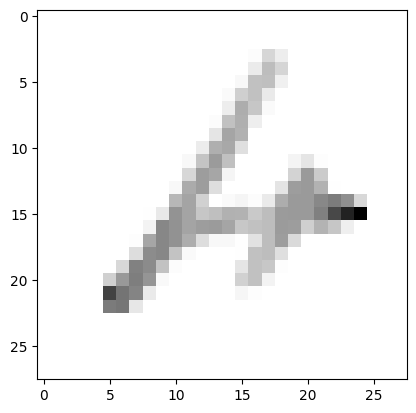

Predicted: 4 - Actual: 9


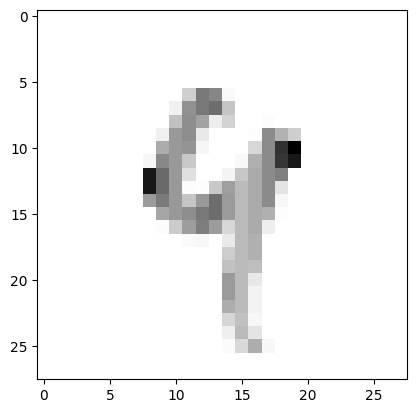

Predicted: 1 - Actual: 7


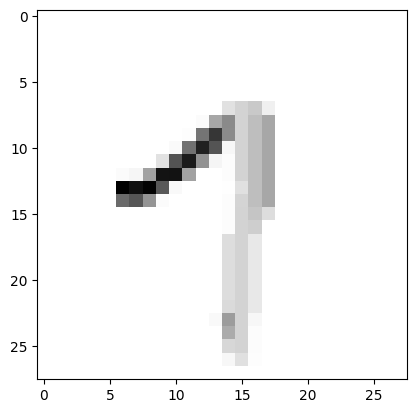

Predicted: 8 - Actual: 2


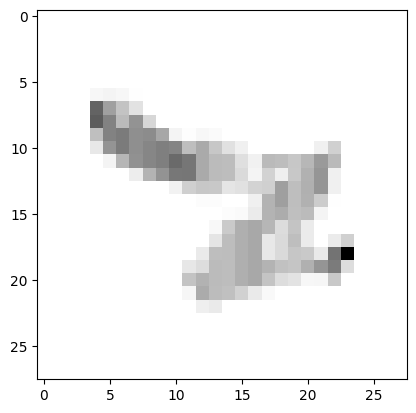

Predicted: 4 - Actual: 9


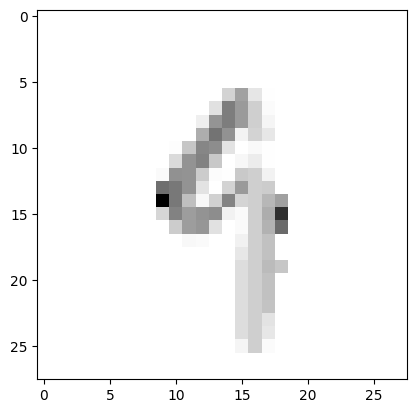

Predicted: 3 - Actual: 5


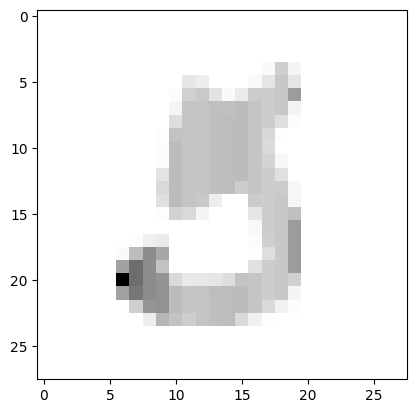

Predicted: 4 - Actual: 9


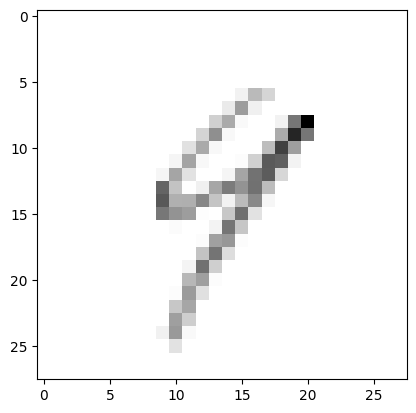

Predicted: 5 - Actual: 6


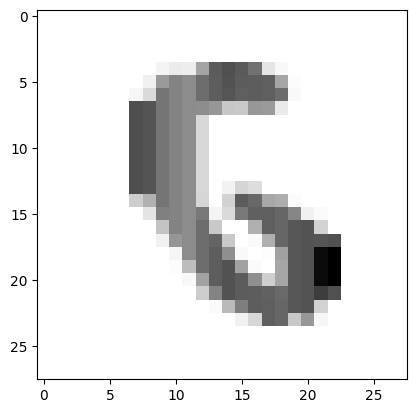

Predicted: 8 - Actual: 6


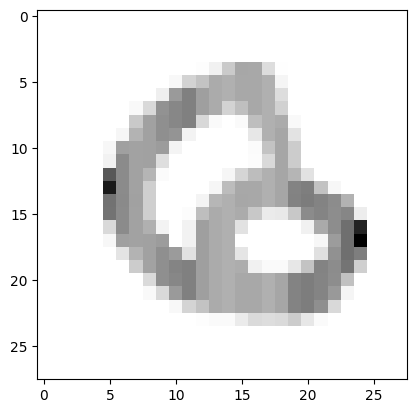

Predicted: 2 - Actual: 4


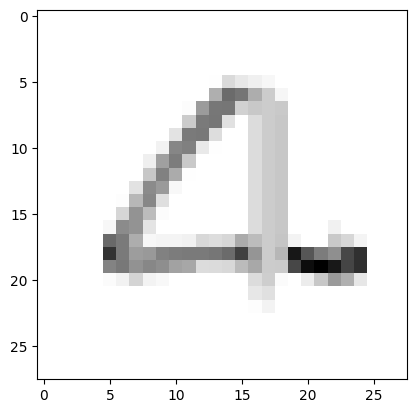

Predicted: 9 - Actual: 8


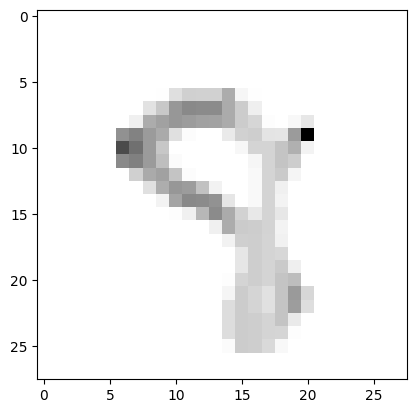

Predicted: 5 - Actual: 3


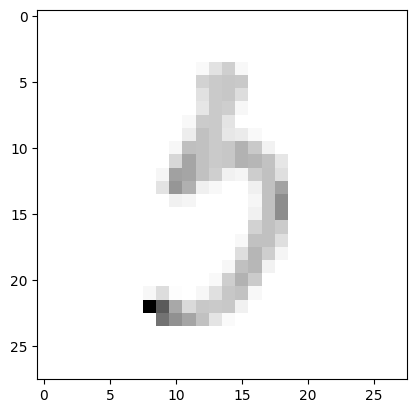

Predicted: 4 - Actual: 9


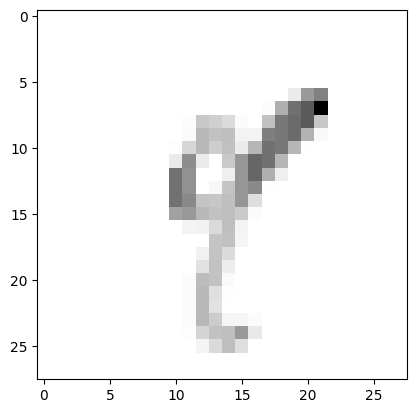

Predicted: 0 - Actual: 8


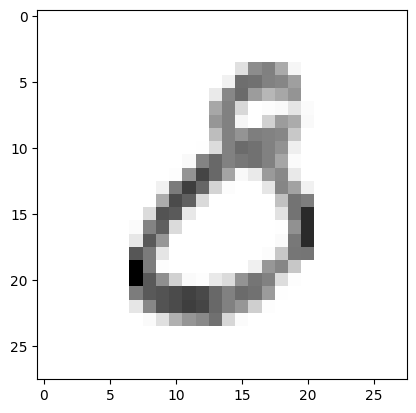

Predicted: 0 - Actual: 6


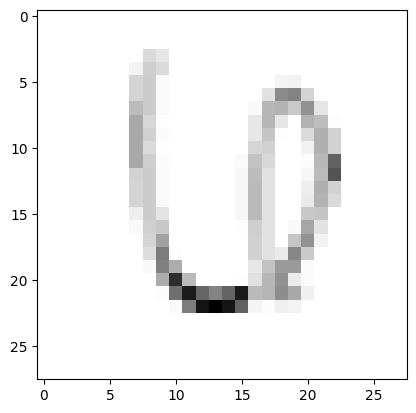

Predicted: 2 - Actual: 7


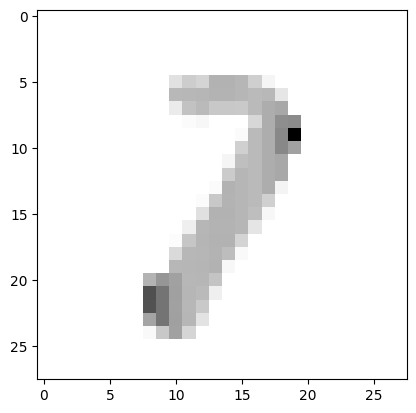

Predicted: 9 - Actual: 4


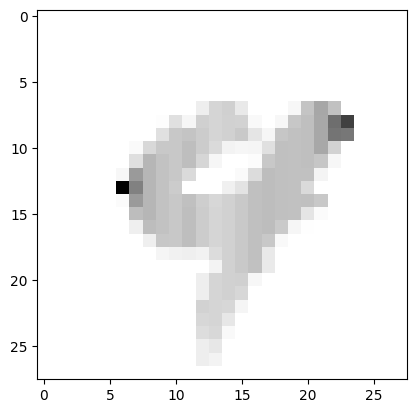

Predicted: 2 - Actual: 4


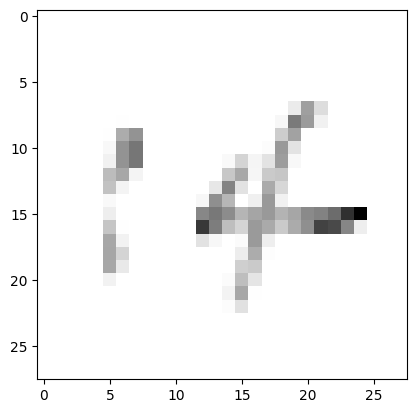

Predicted: 0 - Actual: 7


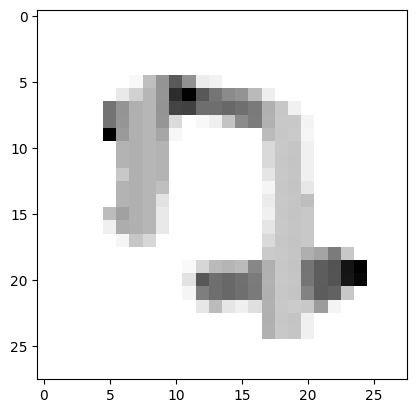

Predicted: 3 - Actual: 5


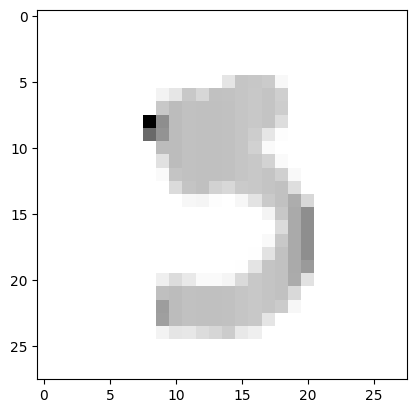

Predicted: 5 - Actual: 3


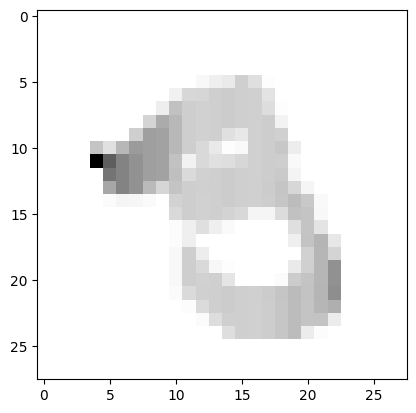

Predicted: 3 - Actual: 9


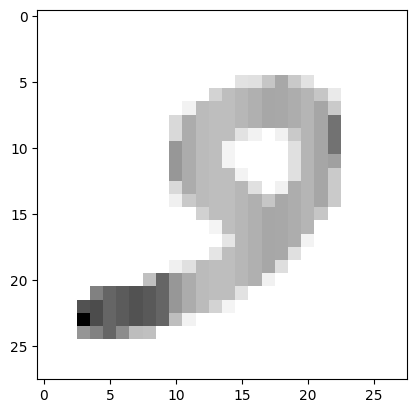

Predicted: 7 - Actual: 9


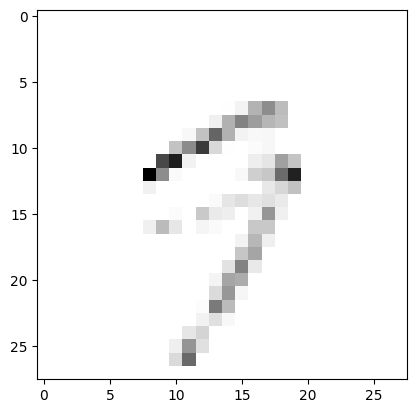

Predicted: 1 - Actual: 7


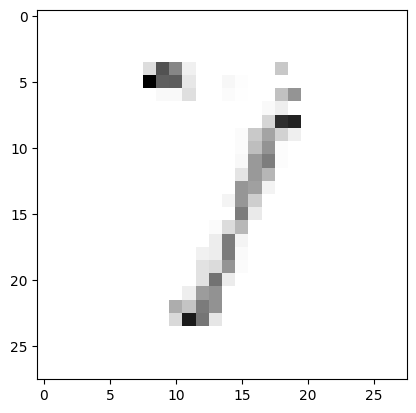

Predicted: 7 - Actual: 0


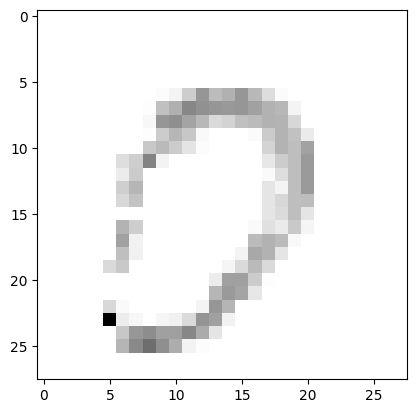

Predicted: 6 - Actual: 1


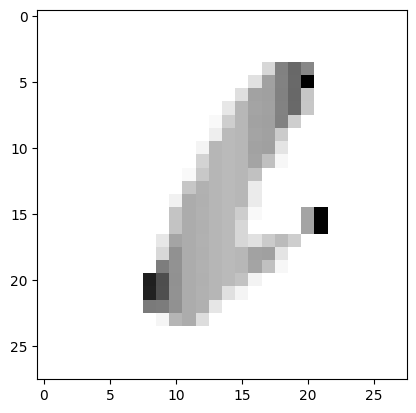

Predicted: 8 - Actual: 2


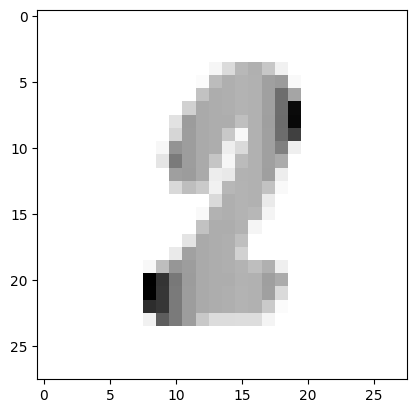

Predicted: 2 - Actual: 6


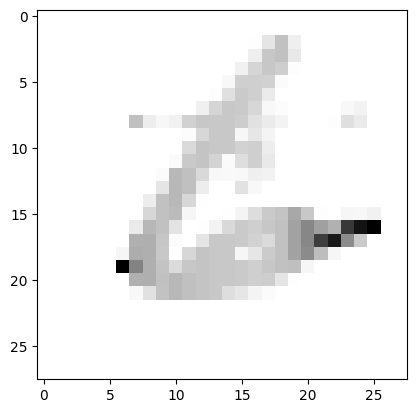

Predicted: 2 - Actual: 6


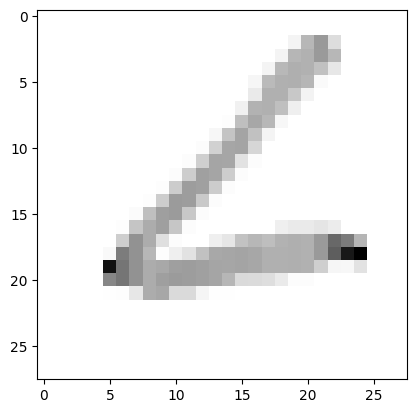

Predicted: 4 - Actual: 9


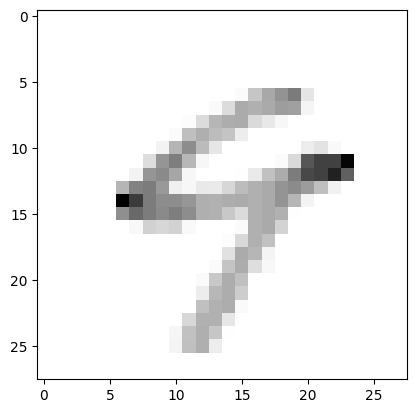

Predicted: 9 - Actual: 4


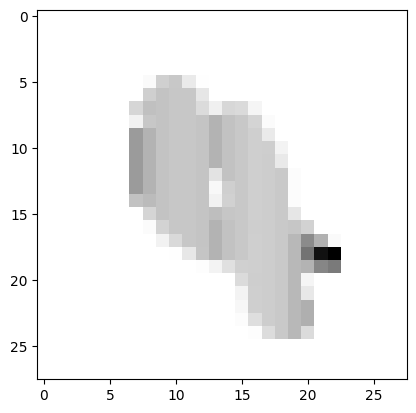

Predicted: 2 - Actual: 7


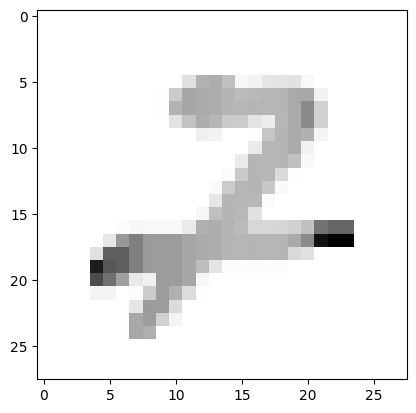

Predicted: 2 - Actual: 7


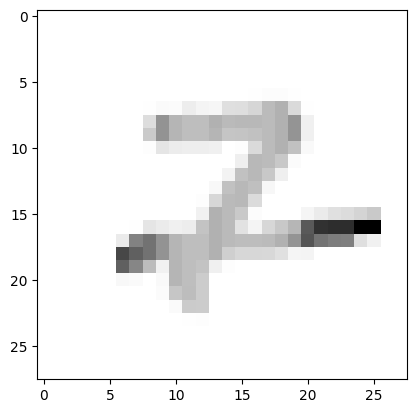

Predicted: 2 - Actual: 7


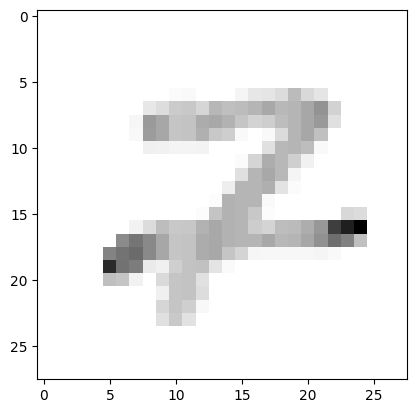

Predicted: 2 - Actual: 7


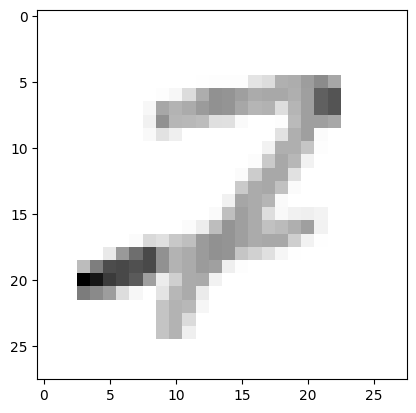

Predicted: 8 - Actual: 1


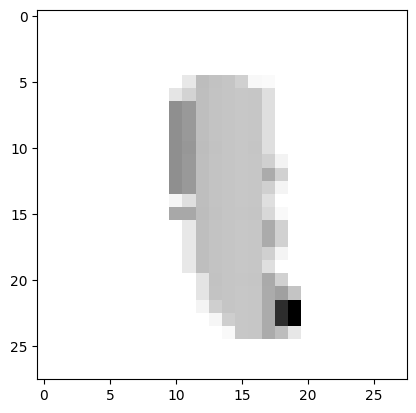

Predicted: 4 - Actual: 9


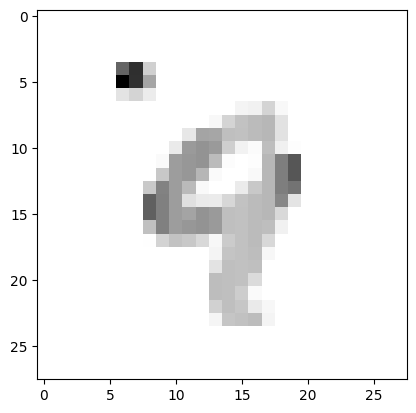

Predicted: 3 - Actual: 6


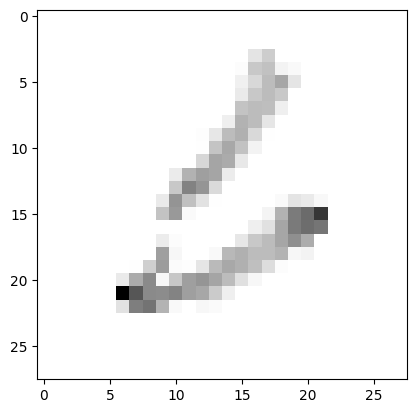

Predicted: 4 - Actual: 9


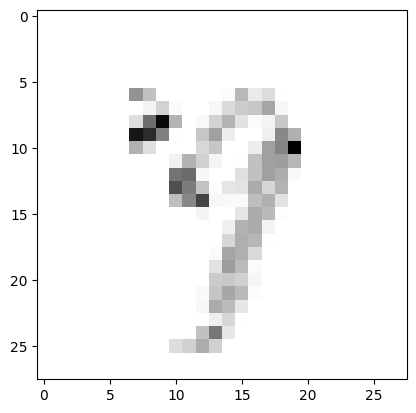

Predicted: 6 - Actual: 5


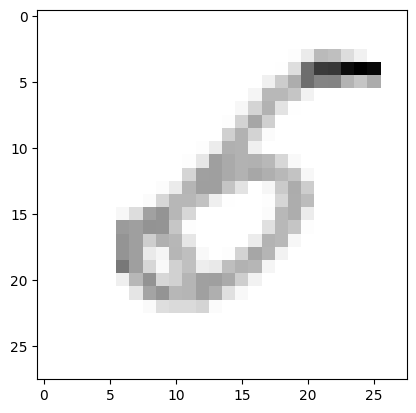

Predicted: 0 - Actual: 5


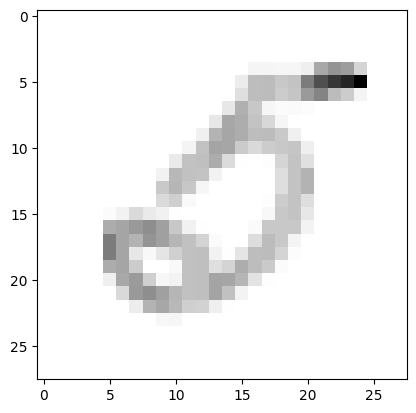

Predicted: 4 - Actual: 9


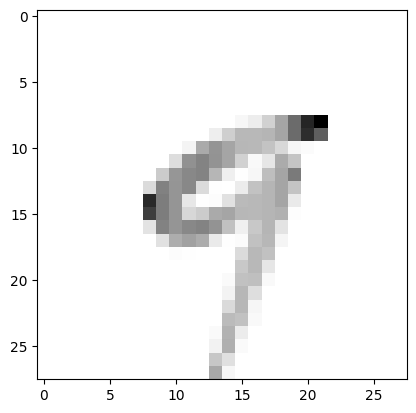

Predicted: 8 - Actual: 0


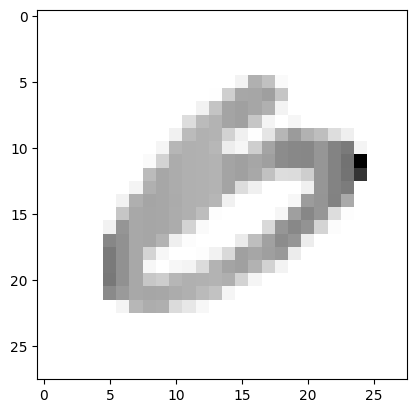

Predicted: 0 - Actual: 6


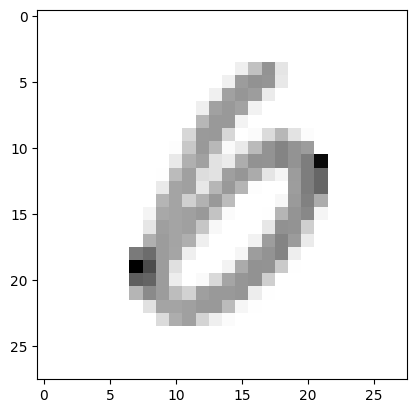

Predicted: 4 - Actual: 9


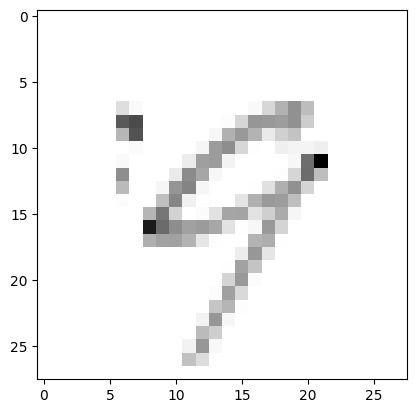

In [5]:
def cleanPredictions(predictions):
    _predictions = []
    for p in predictions:
        _predictions.append(np.argmax(p))
    return _predictions

predictions = cleanPredictions(model.predict(x_test))

for i in range(0, len(y_test)-1):
    if predictions[i]!=y_test[i]:
        print("Predicted: {} - Actual: {}".format(predictions[i], y_test[i]))
        plt.imshow(x_test[i], cmap='Greys')
        plt.show()

